In [463]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.cluster import KMeans


In [464]:
X = np.array([[3,5],
             [3,4],
             [2,8],
             [2,3],
             [6,2],
             [6,4],
             [7,3],
             [7,4],
             [8,5],
             [7,6],])

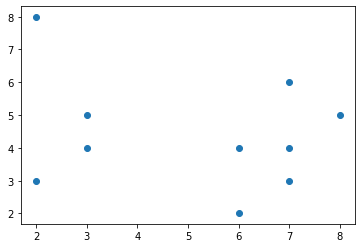

In [465]:
plt.scatter(X[:,0],X[:,1], label='True Position')

In [466]:
# Euclidean and Manhattan distances equations
def Euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))
def Manhattan_distance(point1, point2):
    return np.sum(np.absolute(point1 - point2))

In [467]:
# KMeans implementation
def KMeans(X,start_centers,dist):
    cluster0 = []
    cluster1 = []
    Manh_cluster0 = []
    Manh_cluster1 = []
    if(dist == Euclidean_distance):
        for i in X:
            if(Euclidean_distance(i,start_centers[0])> Euclidean_distance(i,start_centers[1]) ):
                cluster1.append(i)
            else:
                cluster0.append(i)
        return cluster0, cluster1
    
    if(dist == Manhattan_distance):
        for i in X:
            if(Manhattan_distance(i,start_centers[0])> Manhattan_distance(i,start_centers[1]) ):
                Manh_cluster1.append(i)
            else:
                Manh_cluster0.append(i)
        return Manh_cluster0, Manh_cluster1


In [468]:
# Updating centroids
def Update_cluster(cluster0,cluster1):
    sum = 0
    for i in range(len(cluster0)):
        sum = sum + cluster0[i][0]
    sum/len(cluster0)
    sum1 = 0
    for j in range(len(cluster0)):
        sum1 = sum1 + cluster0[j][1]
    sum1/len(cluster0)
    new_cluster0 = np.array([sum/len(cluster0),sum1/len(cluster0)])
    sum = 0
    for i in range(len(cluster1)):
        sum = sum + cluster1[i][0]
    sum/len(cluster1)
    sum1 = 0
    for j in range(len(cluster1)):
        sum1 = sum1 + cluster1[j][1]
    sum1/len(cluster1)
    new_cluster1 = np.array([sum/len(cluster1),sum1/len(cluster1)])
    return new_cluster0, new_cluster1
    

In [469]:
# Euclidean dist with initial centroids (4,6) & (5,4)
start_centers = np.array([[4,6],[5,4]])

cluster0, cluster1 = KMeans(X,start_centers,Euclidean_distance)
new_cluster0, new_cluster1 = Update_cluster(cluster0, cluster1)


In [470]:
new_start_centers = [new_cluster0, new_cluster1]

In [471]:
new_start_centers

[array([2.5, 6.5]), array([5.75 , 3.875])]

In [472]:
cluster0, cluster1

([array([3, 5]), array([2, 8])],
 [array([3, 4]),
  array([2, 3]),
  array([6, 2]),
  array([6, 4]),
  array([7, 3]),
  array([7, 4]),
  array([8, 5]),
  array([7, 6])])

In [473]:
iter = 1
not_conver = True
while(not_conver):
    iter = iter+1
    start_centers = new_start_centers
    cluster0, cluster1 = KMeans(X,new_start_centers,Euclidean_distance)
    new_cluster0, new_cluster1 = Update_cluster(cluster0, cluster1)
    new_start_centers = [new_cluster0, new_cluster1]
    if ((start_centers[0] == new_start_centers[0]).all() and (start_centers[1] == new_start_centers[1]).all()):
        not_conver = False
        break
print(iter)
print(new_cluster0, new_cluster1)

3
[2.5 5. ] [6.83333333 4.        ]


In [474]:
cluster0, cluster1

([array([3, 5]), array([3, 4]), array([2, 8]), array([2, 3])],
 [array([6, 2]),
  array([6, 4]),
  array([7, 3]),
  array([7, 4]),
  array([8, 5]),
  array([7, 6])])

In [475]:
# Manhattan dist with initial centroids (4,6) & (5,4)
start_centers = np.array([[4,6],[5,4]])
Manh_cluster0, Manh_cluster1 = KMeans(X,start_centers,Manhattan_distance)
Manh_new_cluster0, Manh_new_cluster1 = Update_cluster(Manh_cluster0, Manh_cluster1)

In [476]:
Manh_new_start_centers = [Manh_new_cluster0, Manh_new_cluster1]

In [477]:
Manh_new_start_centers

[array([4.        , 6.33333333]), array([5.57142857, 3.57142857])]

In [478]:
Manh_cluster0, Manh_cluster1

([array([3, 5]), array([2, 8]), array([7, 6])],
 [array([3, 4]),
  array([2, 3]),
  array([6, 2]),
  array([6, 4]),
  array([7, 3]),
  array([7, 4]),
  array([8, 5])])

In [479]:
iter = 1
not_conver = True
while(not_conver):
    iter = iter+1
    start_centers = Manh_new_start_centers
    Manh_cluster0, Manh_cluster1 = KMeans(X,Manh_new_start_centers,Manhattan_distance)
    Manh_new_cluster0, Manh_new_cluster1 = Update_cluster(Manh_cluster0, Manh_cluster1)
    Manh_new_start_centers = [Manh_new_cluster0, Manh_new_cluster1]
    if ((start_centers[0] == Manh_new_start_centers[0]).all() and (start_centers[1] == Manh_new_start_centers[1]).all()):
        not_conver = False
        break
print(iter)
print(Manh_new_cluster0, Manh_new_cluster1)

2
[4.         6.33333333] [5.57142857 3.57142857]


In [480]:
Manh_cluster0, Manh_cluster1

([array([3, 5]), array([2, 8]), array([7, 6])],
 [array([3, 4]),
  array([2, 3]),
  array([6, 2]),
  array([6, 4]),
  array([7, 3]),
  array([7, 4]),
  array([8, 5])])

In [481]:
# Manhattan dist with initial centroids (3,3) & (8,3)
start_centers = np.array([[3,3],[8,3]])
Manh_cluster0, Manh_cluster1 = KMeans(X,start_centers,Manhattan_distance)
Manh_new_cluster0, Manh_new_cluster1 = Update_cluster(Manh_cluster0, Manh_cluster1)

In [482]:
Manh_new_start_centers = [Manh_new_cluster0, Manh_new_cluster1]

In [483]:
Manh_new_start_centers

[array([2.5, 5. ]), array([6.83333333, 4.        ])]

In [484]:
Manh_cluster0, Manh_cluster1

([array([3, 5]), array([3, 4]), array([2, 8]), array([2, 3])],
 [array([6, 2]),
  array([6, 4]),
  array([7, 3]),
  array([7, 4]),
  array([8, 5]),
  array([7, 6])])

In [485]:
iter = 1
not_conver = True
while(not_conver):
    iter = iter+1
    start_centers = Manh_new_start_centers
    Manh_cluster0, Manh_cluster1 = KMeans(X,Manh_new_start_centers,Manhattan_distance)
    Manh_new_cluster0, Manh_new_cluster1 = Update_cluster(Manh_cluster0, Manh_cluster1)
    Manh_new_start_centers = [Manh_new_cluster0, Manh_new_cluster1]
    if ((start_centers[0] == Manh_new_start_centers[0]).all() and (start_centers[1] == Manh_new_start_centers[1]).all()):
        not_conver = False
        break
print(iter)
print(Manh_new_cluster0, Manh_new_cluster1)

2
[2.5 5. ] [6.83333333 4.        ]


In [486]:
Manh_cluster0, Manh_cluster1

([array([3, 5]), array([3, 4]), array([2, 8]), array([2, 3])],
 [array([6, 2]),
  array([6, 4]),
  array([7, 3]),
  array([7, 4]),
  array([8, 5]),
  array([7, 6])])

In [487]:
# Manhattan dist with initial centroids (3,2) & (4,8)
start_centers = np.array([[3,2],[4,8]])
Manh_cluster0, Manh_cluster1 = KMeans(X,start_centers,Manhattan_distance)
Manh_new_cluster0, Manh_new_cluster1 = Update_cluster(Manh_cluster0, Manh_cluster1)

In [488]:
Manh_new_start_centers = [Manh_new_cluster0, Manh_new_cluster1]

In [489]:
Manh_new_start_centers

[array([4.85714286, 3.57142857]), array([5.66666667, 6.33333333])]

In [490]:
Manh_cluster0, Manh_cluster1

([array([3, 5]),
  array([3, 4]),
  array([2, 3]),
  array([6, 2]),
  array([6, 4]),
  array([7, 3]),
  array([7, 4])],
 [array([2, 8]), array([8, 5]), array([7, 6])])

In [491]:
iter = 1
not_conver = True
while(not_conver):
    iter = iter+1
    start_centers = Manh_new_start_centers
    Manh_cluster0, Manh_cluster1 = KMeans(X,Manh_new_start_centers,Manhattan_distance)
    Manh_new_cluster0, Manh_new_cluster1 = Update_cluster(Manh_cluster0, Manh_cluster1)
    Manh_new_start_centers = [Manh_new_cluster0, Manh_new_cluster1]
    if ((start_centers[0] == Manh_new_start_centers[0]).all() and (start_centers[1] == Manh_new_start_centers[1]).all()):
        not_conver = False
        break
print(iter)
print(Manh_new_cluster0, Manh_new_cluster1)

2
[4.85714286 3.57142857] [5.66666667 6.33333333]


In [492]:
Manh_cluster0, Manh_cluster1

([array([3, 5]),
  array([3, 4]),
  array([2, 3]),
  array([6, 2]),
  array([6, 4]),
  array([7, 3]),
  array([7, 4])],
 [array([2, 8]), array([8, 5]), array([7, 6])])